In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/db-sentiment/test_data.json
/kaggle/input/db-sentiment/train_data.json


In [2]:
!pip install  tweetnlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 34.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 60.6 MB/s eta 0:00:00:00:010:01
  Created wheel for tweetnlp: filename=tweetnlp-0.4.4-py3-none-any.whl size=40458 sha256=df1b8c49b0ddd18dfcd640929901716a9cf9516ca14a306fbd5fcf886411c894
  Stored in directory: /root/.cache/pip/wheels/e3/20/85/708a7c81f0cb549df06f7cf9658391f3b471c897867cf429f6
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=78c70ddc7ada936838f67fbc090b5d87257f9b82d4a2a8f32e351749547251cc
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1

In [3]:
import tweetnlp
import json
INPUT_FILE_PATH = r'/kaggle/input/db-sentiment/train_data.json'
OUTPUT_FILE_PATH = r'/kaggle/working/predict_train.json'

model = tweetnlp.Classifier("cardiffnlp/twitter-xlm-roberta-base-sentiment-multilingual", max_length=128)
# model = None
data = []

# Вход и обучение
prediction_label = [0,0,0] # neutral positive negative
gt = [0,0,0,0] # neutral positive negative
di = {"neutrals":0,"positives":1,"negatives":2}
metrics = 0
with open(INPUT_FILE_PATH, encoding='utf-8-sig') as json_file:
    i = 0
    for batch in json.load(json_file):
        for gg in batch['answers']:
            answer = gg['answer']
            sentiment = gg['sentiment']
            prediction = model.predict(str(answer))
            result = ''
            if prediction['label'] == 'neutral':
                result = 'neutrals'
                prediction_label[0] += 1
            elif prediction['label'] == 'positive':
                result = 'positives'
                prediction_label[1] += 1
            elif prediction['label'] == 'negative':
                result = 'negatives'
                prediction_label[2] +=1
            
            
            gt[di.get(sentiment,3)] +=1 
                

            gg['cluster'] =  answer
            gg['sentiment_our'] = result
            

        data.append(batch)
        
        print("GT: ", gt)
        print("prediction_label: ", prediction_label)
            

        i+=1
# Выход и сохранение


with open(OUTPUT_FILE_PATH, 'w',encoding='utf-8-sig') as f:
    f.write(json.dumps(data, indent=4))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GT:  [3, 4, 1, 0]
prediction_label:  [7, 1, 0]
GT:  [12, 7, 1, 0]
prediction_label:  [16, 3, 1]
GT:  [30, 14, 1, 0]
prediction_label:  [36, 7, 2]
GT:  [39, 14, 1, 0]
prediction_label:  [45, 7, 2]
GT:  [48, 14, 1, 0]
prediction_label:  [54, 7, 2]
GT:  [62, 14, 1, 0]
prediction_label:  [68, 7, 2]
GT:  [65, 21, 2, 0]
prediction_label:  [72, 11, 5]
GT:  [72, 27, 2, 0]
prediction_label:  [82, 13, 6]
GT:  [75, 30, 3, 0]
prediction_label:  [85, 15, 8]
GT:  [78, 31, 3, 0]
prediction_label:  [87, 17, 8]
GT:  [82, 31, 3, 0]
prediction_label:  [91, 17, 8]
GT:  [84, 36, 3, 0]
prediction_label:  [98, 17, 8]
GT:  [91, 44, 13, 0]
prediction_label:  [109, 22, 17]
GT:  [98, 48, 13, 0]
prediction_label:  [118, 23, 18]
GT:  [108, 49, 13, 0]
prediction_label:  [129, 23, 18]
GT:  [110, 51, 13, 0]
prediction_label:  [132, 24, 18]
GT:  [153, 55, 44, 0]
prediction_label:  [182, 30, 40]
GT:  [156, 56, 45, 0]
prediction_label:  [184, 32, 41]
GT:  [160, 58, 45, 0]
prediction_label:  [190, 32, 41]
GT:  [167, 58, 

In [4]:
print("_---------_"*10)
print("GT: ", gt)
print("prediction_label: ", prediction_label)
print("_---------_"*10)

_---------__---------__---------__---------__---------__---------__---------__---------__---------__---------_
GT:  [3329, 1651, 114, 145]
prediction_label:  [3802, 1042, 395]
_---------__---------__---------__---------__---------__---------__---------__---------__---------__---------_


In [5]:
import tweetnlp
import json
INPUT_FILE_PATH = r'/kaggle/input/db-sentiment/test_data.json'
OUTPUT_FILE_PATH = r'/kaggle/working/predict_test.json'

model = tweetnlp.Classifier("cardiffnlp/twitter-xlm-roberta-base-sentiment-multilingual", max_length=128)
# model = None
data = []

# Вход и обучение
prediction_label = [0,0,0] # neutral positive negative
di = {"neutrals":0,"positives":1,"negatives":2}
metrics = 0
with open(INPUT_FILE_PATH, encoding='utf-8-sig') as json_file:
    i = 0
    for batch in json.load(json_file):
        for gg in batch['answers']:
            answer = gg['answer']
            prediction = model.predict(str(answer))
            result = ''
            if prediction['label'] == 'neutral':
                result = 'neutrals'
                prediction_label[0] += 1
            elif prediction['label'] == 'positive':
                result = 'positives'
                prediction_label[1] += 1
            elif prediction['label'] == 'negative':
                result = 'negatives'
                prediction_label[2] +=1
            
            gg['cluster'] =  answer
            gg['sentiment_our'] = result


        data.append(batch)
        if i % 10==0:
            print("prediction_label: ", prediction_label)
            

        i+=1
# Выход и сохранение


with open(OUTPUT_FILE_PATH, 'w',encoding='utf-8-sig') as f:
    f.write(json.dumps(data, indent=4))

prediction_label:  [423, 134, 45]


In [6]:
pip install top2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 38.6 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=735828 sha256=d5386669229e6b788afbbf275619116321f2c9c12873d9bb9172d25122d97e1c
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install sentence_transformers
import pickle
import pandas as pd
import os
import numpy as np
from sentence_transformers import SentenceTransformer
import subprocess



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=e0777a1b092a4d708415b73070758e5627399d3c8b2e6612cc7f310f691bab43
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased-v2')

query_embedding = model.encode('How many people live in London?')

passage_embedding = model.encode([['London', 'London has 9,787,426 inhabitants at the 2011 census.']])



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
query_embedding = model.encode('😭😭😭😭')
query_embedding.shape

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

(512,)

In [31]:
.shape

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

(512,)

In [1]:
gg['answer']

NameError: name 'gg' is not defined

In [16]:
import json
import pandas as pd
INPUT_FILE_PATH = r'/kaggle/input/db-sentiment/test_data.json'
OUTPUT_FILE_PATH = r'/kaggle/working/predict_test.json'

data = []
df = pd.DataFrame(columns=['question','answer','ans_embed','i','j'])

# Вход и обучение
with open(INPUT_FILE_PATH, encoding='utf-8-sig') as json_file:
    i = 0
    for batch in json.load(json_file):
        print()
        j = 0
        for gg in batch['answers']:
            new_row = {'question':batch['question'],'answer': gg['answer'], 'ans_embed': model.encode(gg['answer']),'i':i,'j':j}
            new_row_df = pd.DataFrame([new_row])
            df = pd.concat([df, new_row_df], ignore_index=True)
            j+=1
        i+=1
        
        new_row = {'question':batch['question'],'answer': '😭😭😭😭', 'ans_embed': model.encode('😭😭😭😭'),'i':i,'j':j}
        new_row_df = pd.DataFrame([new_row])
        df = pd.concat([df, new_row_df], ignore_index=True)
        new_row = {'question':batch['question'],'answer': '🥲🥲🥲', 'ans_embed': model.encode('🥲🥲🥲'),'i':i,'j':j}
        new_row_df = pd.DataFrame([new_row])
        df = pd.concat([df, new_row_df], ignore_index=True)
        
        break

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
df.head()

,question,answer,ans_embed,i,j
0,Что вы сможете использовать в своей работе?,"формулировать проблему, 5 поче","[-0.008389941, -0.022004645, -0.0057491167, 0....",0,0
1,Что вы сможете использовать в своей работе?,поиск потерь,"[0.030704066, -0.013832011, 0.016141353, 0.039...",0,1
2,Что вы сможете использовать в своей работе?,правило 5 «почему» :),"[0.012495924, -0.066732384, -0.033257846, 0.00...",0,2
3,Что вы сможете использовать в своей работе?,умение работать в команде,"[0.019752176, 0.0074638445, -0.029643424, -0.0...",0,3
4,Что вы сможете использовать в своей работе?,картирование и анализ,"[-0.026560182, 0.0063696397, 0.027204074, 0.07...",0,4


In [75]:
df.to_csv(r'/kaggle/working/emb_data.csv')

In [46]:
df

,sentence,embed
0,NaN,1
1,NaN,2


In [24]:
# Reduce dimensionality using PCA
from sklearn.decomposition import PCA

# Function to return the principal components
def get_pc(arr,n):
  pca = PCA(n_components=n)
  embeds_transform = pca.fit_transform(arr)
  return embeds_transform

In [4]:
passage_embedding

array([[ 0.03609718, -0.0144876 , -0.04018253, -0.01961432, -0.05893195,
         0.01169187,  0.03414149, -0.03789142, -0.05559697, -0.03071596,
        -0.0473364 , -0.02498637,  0.02965888,  0.03034404,  0.06467985,
        -0.02196306, -0.03630853,  0.01058827,  0.04539162, -0.04474467,
        -0.03097682, -0.03754583, -0.01163726, -0.0004365 , -0.07309769,
         0.00448651, -0.02161057, -0.00076857, -0.00700358,  0.00733566,
        -0.03459445,  0.04739617,  0.00637615, -0.05342188, -0.01786346,
         0.06906129,  0.01626143, -0.0469742 , -0.0204808 , -0.00633585,
        -0.03568957,  0.00032275, -0.02263127, -0.00572335,  0.00593313,
         0.0493793 , -0.04593042,  0.01824835, -0.03309391,  0.03149853,
        -0.029939  , -0.05030294,  0.01941199,  0.03009543, -0.06223455,
         0.0495426 , -0.05321626,  0.04593445,  0.00762916,  0.00584997,
        -0.03923064, -0.0375964 , -0.03018934,  0.00946651,  0.01201652,
         0.03762043, -0.01369447, -0.03371955, -0.0

In [8]:
# Reduce dimensionality using PCA
from sklearn.decomposition import PCA

# Function to return the principal components
def get_pc(arr,n):
  pca = PCA(n_components=n)
  embeds_transform = pca.fit_transform(arr)
  return embeds_transform

In [77]:
df_c = df[:10].copy()

In [85]:
df_c.head(100)

,question,answer,ans_embed,i,j
0,Что вы сможете использовать в своей работе?,"формулировать проблему, 5 поче","[-0.008389941, -0.022004645, -0.0057491167, 0....",0,0
1,Что вы сможете использовать в своей работе?,поиск потерь,"[0.030704066, -0.013832011, 0.016141353, 0.039...",0,1
2,Что вы сможете использовать в своей работе?,правило 5 «почему» :),"[0.012495924, -0.066732384, -0.033257846, 0.00...",0,2
3,Что вы сможете использовать в своей работе?,умение работать в команде,"[0.019752176, 0.0074638445, -0.029643424, -0.0...",0,3
4,Что вы сможете использовать в своей работе?,картирование и анализ,"[-0.026560182, 0.0063696397, 0.027204074, 0.07...",0,4
5,Что вы сможете использовать в своей работе?,четкое формулирование проблемы,"[-0.007807936, 0.0030616545, 0.0001871353, 0.0...",0,5
6,Что вы сможете использовать в своей работе?,многон,"[0.037399888, -0.019578282, -0.025245784, -0.0...",0,6
7,Что вы сможете использовать в своей работе?,методы выявления проблем,"[0.005593059, 0.02826495, 0.007457281, 0.05494...",0,7
8,Что вы сможете использовать в своей работе?,методы решения проблем,"[0.01005407, 0.023529425, -0.0023967188, 0.039...",0,8
9,Что вы сможете использовать в своей работе?,картирование,"[0.0006376131, -0.0045643235, 0.0082626715, 0....",0,9


In [15]:
embeds = np.array(df['ans_embed'].tolist())

embeds.shape

(20, 512)

In [18]:
# Reduce embeddings to 10 principal components to aid visualization
embeds = np.array(df['ans_embed'].tolist())
embeds_pc = get_pc(embeds,10)

In [81]:
! pip install  altair > /dev/null

In [92]:
alt.data_transformers.enable()

DataTransformerRegistry.enable('vegafusion')

In [88]:
pip install "vegafusion[embed]>=1.4.0"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 49.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.4/24.4 MB 17.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [20]:
df_c = df.copy()

In [21]:
df_c = df_c[['answer','ans_embed']]
df_c.head()

,answer,ans_embed
0,"формулировать проблему, 5 поче","[-0.008389941, -0.022004645, -0.0057491167, 0...."
1,поиск потерь,"[0.030704066, -0.013832011, 0.016141353, 0.039..."
2,правило 5 «почему» :),"[0.012495924, -0.066732384, -0.033257846, 0.00..."
3,умение работать в команде,"[0.019752176, 0.0074638445, -0.029643424, -0.0..."
4,картирование и анализ,"[-0.026560182, 0.0063696397, 0.027204074, 0.07..."


In [22]:
import altair as alt

# Set sample size to visualize
sample = 20

# Reshape the data for visualization purposes
source = pd.DataFrame(embeds_pc)[:sample]
source = pd.concat([source,df_c['answer']], axis=1)
source = source.melt(id_vars=['answer'])

# Configure the plot
chart = alt.Chart(source).mark_rect().encode(
    x=alt.X('variable:N', title="Embedding"),
    y=alt.Y('answer:N', title='',axis=alt.Axis(labelLimit=500)),
    color=alt.Color('value:Q', title="Value", scale=alt.Scale(
                range=["#917EF3", "#000000"]))
)

result = chart.configure(background='#ffffff'
        ).properties(
        width=700,
        height=400,
        title='Embeddings with 10 dimensions'
       ).configure_axis(
      labelFontSize=15,
      titleFontSize=12)

# Show the plot
result

alt.Chart(...)

In [23]:
# Function to generate the 2D plot
def generate_chart(df_c,xcol,ycol,lbl='on',color='basic',title=''):
  chart = alt.Chart(df_c).mark_circle(size=500).encode(
    x=
    alt.X(xcol,
        scale=alt.Scale(zero=False),
        axis=alt.Axis(labels=False, ticks=False, domain=False)
    ),

    y=
    alt.Y(ycol,
        scale=alt.Scale(zero=False),
        axis=alt.Axis(labels=False, ticks=False, domain=False)
    ),
    
    color= alt.value('#333293') if color == 'basic' else color,
    tooltip=['answer']
    )

  if lbl == 'on':
    text = chart.mark_text(align='left', baseline='middle',dx=15, size=13,color='black').encode(text='answer', color= alt.value('black'))
  else:
    text = chart.mark_text(align='left', baseline='middle',dx=10).encode()

  result = (chart + text).configure(background="#FDF7F0"
        ).properties(
        width=800,
        height=500,
        title=title
       ).configure_legend(
  orient='bottom', titleFontSize=18,labelFontSize=18)
        
  return result

In [24]:
# Reduce embeddings to 2 principal components to aid visualization
embeds_pc2 = get_pc(embeds,3)

# Add the principal components to dataframe
df_pc2 = pd.concat([df_c, pd.DataFrame(embeds_pc2)], axis=1)

# Plot the 2D embeddings on a chart
df_pc2.columns = df_pc2.columns.astype(str)
generate_chart(df_pc2.iloc[:sample],'0','1',title='2D Embeddings')

alt.LayerChart(...)

In [26]:
from sklearn.cluster import KMeans

# Pick the number of clusters
df_clust = df_pc2.copy()
n_clusters=5

# Cluster the embeddings
kmeans_model = KMeans(n_clusters=n_clusters, random_state=0)
classes = kmeans_model.fit_predict(embeds).tolist()
df_clust['cluster'] = (list(map(str,classes)))

# Plot on a chart
df_clust.columns = df_clust.columns.astype(str)
generate_chart(df_clust.iloc[:sample],'0','1',lbl='on',color='cluster',title='Clustering with 2 Clusters')

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


alt.LayerChart(...)

In [27]:
df_clust.head(111)

,answer,ans_embed,0,1,2,cluster
0,"формулировать проблему, 5 поче","[-0.008389941, -0.022004645, -0.0057491167, 0....",0.211995,0.030112,0.112722,1
1,поиск потерь,"[0.030704066, -0.013832011, 0.016141353, 0.039...",0.033952,0.177409,-0.149505,4
2,правило 5 «почему» :),"[0.012495924, -0.066732384, -0.033257846, 0.00...",0.455166,-0.360493,0.441852,3
3,умение работать в команде,"[0.019752176, 0.0074638445, -0.029643424, -0.0...",0.037522,0.077677,-0.036510,2
4,картирование и анализ,"[-0.026560182, 0.0063696397, 0.027204074, 0.07...",-0.445683,0.086873,0.243376,0
5,четкое формулирование проблемы,"[-0.007807936, 0.0030616545, 0.0001871353, 0.0...",0.170682,0.394442,0.000694,1
6,многон,"[0.037399888, -0.019578282, -0.025245784, -0.0...",0.019770,-0.226759,-0.275899,2
7,методы выявления проблем,"[0.005593059, 0.02826495, 0.007457281, 0.05494...",0.152443,0.321669,0.052337,1
8,методы решения проблем,"[0.01005407, 0.023529425, -0.0023967188, 0.039...",0.131524,0.288250,0.005026,1
9,картирование,"[0.0006376131, -0.0045643235, 0.0082626715, 0....",-0.449893,-0.074926,0.118471,0


In [205]:
from umap import UMAP

reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeds)

/opt/conda/lib/python3.10/site-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


reduced_embeddings

In [207]:
reduced_embeddings

array([[ 0.48230052, -2.468511  ],
       [ 2.617619  , -2.1624186 ],
       [ 0.45739853, -1.7640594 ],
       [ 1.8906578 , -2.9584203 ],
       [ 2.6406395 , -1.0520467 ],
       [ 1.175001  , -2.804675  ],
       [ 1.6006159 , -1.3021871 ],
       [ 1.2715423 , -2.0600493 ],
       [ 1.816226  , -2.3736973 ],
       [ 2.260219  , -1.5359428 ]], dtype=float32)

['red', 'green', 'blue', 'orange', 'purple', 'red', 'green', 'red', 'red', 'purple']






Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

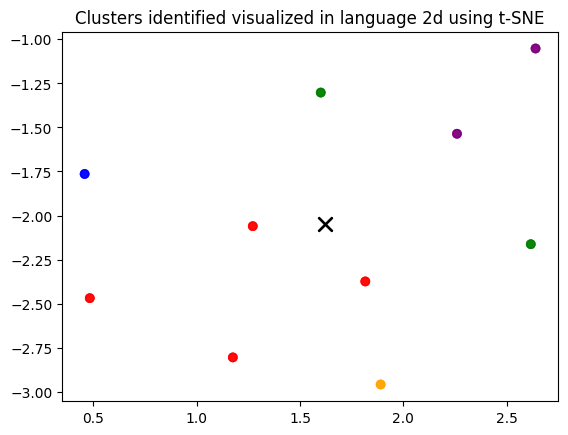

In [208]:

x = [x for x, y in reduced_embeddings]
y = [y for x, y in reduced_embeddings]
di = {"0":"purple", "1":"green", '2':"red","3":"blue", "4":'orange'}
label = [di[label] for label in df_clust.cluster.to_list()]
print(label)
for category, color in enumerate(["purple", "green", "red", "blue"]):
    print()
    xs = np.array(x)
    ys = np.array(y)
    color = label
    plt.scatter(xs, ys, color=color, alpha=0.53)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color='black', s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")

,answer,ans_embed,0,1,2,cluster
0,"формулировать проблему, 5 поче","[-0.008389941, -0.022004645, -0.0057491167, 0....",-0.178184,0.002200,-0.083332,2
1,поиск потерь,"[0.030704066, -0.013832011, 0.016141353, 0.039...",0.058183,-0.034020,0.321697,1
2,правило 5 «почему» :),"[0.012495924, -0.066732384, -0.033257846, 0.00...",-0.540654,0.531593,-0.148684,3
3,умение работать в команде,"[0.019752176, 0.0074638445, -0.029643424, -0.0...",-0.007483,-0.061624,0.448773,4
4,картирование и анализ,"[-0.026560182, 0.0063696397, 0.027204074, 0.07...",0.553174,0.208227,-0.268672,0
5,четкое формулирование проблемы,"[-0.007807936, 0.0030616545, 0.0001871353, 0.0...",-0.121725,-0.381005,-0.160846,2
6,многон,"[0.037399888, -0.019578282, -0.025245784, -0.0...",0.016266,0.117366,0.232961,1
7,методы выявления проблем,"[0.005593059, 0.02826495, 0.007457281, 0.05494...",-0.097326,-0.311618,-0.172921,2
8,методы решения проблем,"[0.01005407, 0.023529425, -0.0023967188, 0.039...",-0.069595,-0.269321,-0.138492,2
9,картирование,"[0.0006376131, -0.0045643235, 0.0082626715, 0....",0.387344,0.198204,-0.030485,0


In [ ]:
generate_chart(df_clust.iloc[:sample],'0','1',lbl='on',color='cluster',title='Clustering with 2 Clusters')

In [163]:
print(df_clust.shape)
print(embeds.shape)

(10, 6)
(10, 512)


['purple', 'purple', 'red', 'purple', 'green', 'purple', 'purple', 'purple', 'purple', 'green']






Text(0.5, 1.0, 'Clusters identified visualized in language 2d using t-SNE')

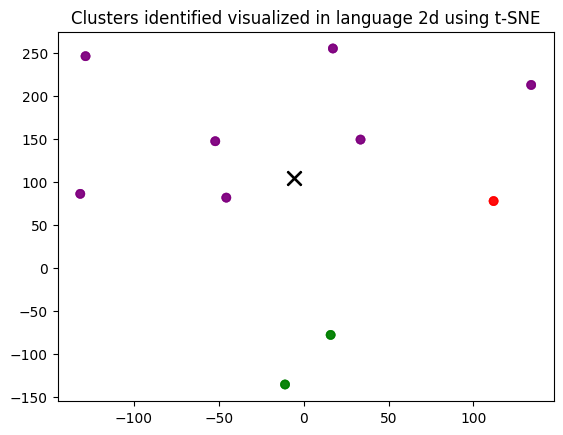

In [192]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=4, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(embeds)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]
di = {"0":"purple", "1":"green", '2':"red","3":"blue"}
label = [di[label] for label in df_clust.cluster.to_list()]
print(label)
for category, color in enumerate(["purple", "green", "red", "blue"]):
    print()
    xs = np.array(x)
    ys = np.array(y)
    color = label
    plt.scatter(xs, ys, color=color, alpha=0.53)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color='black', s=100)
plt.title("Clusters identified visualized in language 2d using t-SNE")

In [158]:
x

[123.36817,
 191.81686,
 283.01138,
 -40.741444,
 -76.96958,
 186.96423,
 7.258257,
 160.61673,
 136.64699,
 -71.89906]

In [197]:
embeds.shape

(10, 512)

In [198]:
embeds_pc.shape

(10, 10)

In [196]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=5, cluster_selection_method='eom')
res = hdbscan_model.fit(embeds)
res.labels_


array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

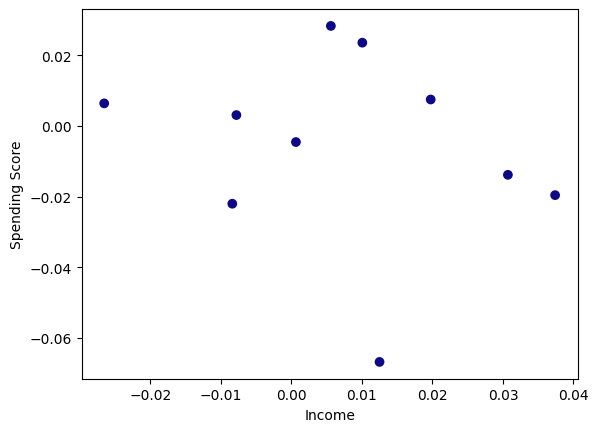

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [199]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# cluster the data into five clusters
dbscan = DBSCAN(eps = 0.01, min_samples = 3).fit(embeds_pc) # fitting the model
labels = dbscan.labels_ # getting the labels
# Plot the clusters
plt.scatter(embeds[:, 0],embeds[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot
labels

In [ ]:
hdbscan_model

In [128]:
df_clust[['answer','cluster']].to_csv("tema.csv")

In [16]:
from top2vec import Top2Vec

documents = ["мама","папа", "кошка", "рис", "собака", "овощ"]
model = Top2Vec(documents)

2023-09-09 09:16:09,068 - top2vec - INFO - Pre-processing documents for training
2023-09-09 09:16:09,071 - top2vec - INFO - Creating joint document/word embedding


RuntimeError: you must first build vocabulary before training the model

In [ ]:
model_name = "sentence-transformers/all-MiniLM-L12-v2" 
sentence_transformer = SentenceTransformer(model_name)
parquet_folder = "/kaggle/input/wikipedia-20230701"
faiss_index_path = "/kaggle/working/wikipedia_embeddings.index"

In [ ]:
document_embeddings = []
for idx, filename in enumerate(os.listdir(parquet_folder)):
    # number, other and wiki_2023_index files are not what we need
    if filename.endswith(".parquet") and not (filename.endswith("number.parquet") or filename.endswith("other.parquet") or filename.endswith("wiki_2023_index.parquet")):
        print(f"Processing file_id: {idx} - file_name: {filename} ......")
        parquet_path = os.path.join(parquet_folder, filename)
        df = pd.read_parquet(parquet_path)
        df.text = df.text.apply(lambda x: x.split("==")[0])# we trim an article to an abstract in this line
        sentences = df.text.tolist()
        embeddings = sentence_transformer.encode(sentences, normalize_embeddings=True)

In [22]:
import tweetnlp
model = tweetnlp.Classifier("cardiffnlp/twitter-xlm-roberta-base-sentiment-multilingual", max_length=128)


{'label': 'positive'}

In [27]:
model.predict('у нас кончился материал ')


{'label': 'negative'}

In [5]:
model = tweetnlp.load_model('emotion')  # Or `model = tweetnlp.Emotion()`
model.emotion('упростить закупки')  # Or `model.predict`


{'label': 'anticipation'}

In [10]:
import tweetnlp
model = tweetnlp.Classifier("cardiffnlp/roberta-base-topic-multi", max_length=128)
model.predict('Вопрос 8. Какая поддержка нам нужна от руководителей отрасли и дивизиона? топ менеджеры')

{'label': 'relationships'}